<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Cluster_0_Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import math

%matplotlib inline

In [44]:
data_df = pd.read_csv('cluster0.csv')
data_df.head()

,temperature,humidity,label,cluster
0,23,64,jagung,0
1,27,72,jagung,0
2,24,72,jagung,0
3,20,58,jagung,0
4,19,63,jagung,0


In [45]:
data_df.describe()

,temperature,humidity,cluster
count,665.000000,665.000000,665.0
mean,27.610526,59.142857,0.0
std,4.173952,7.945544,0.0
min,19.000000,39.000000,0.0
25%,25.000000,53.000000,0.0
50%,28.000000,61.000000,0.0
75%,30.000000,66.000000,0.0
max,37.000000,73.000000,0.0


In [46]:
data_df.shape

(665, 4)

In [47]:
data_df.dtypes

temperature     int64
humidity        int64
label          object
cluster         int64
dtype: object

In [48]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
cluster        0
dtype: int64

In [49]:
data_df[data_df.duplicated()]

,temperature,humidity,label,cluster
7,26,67,jagung,0
18,19,63,jagung,0
29,19,56,jagung,0
35,25,71,jagung,0
40,25,69,jagung,0
...,...,...,...,...
658,24,51,kopi,0
659,25,54,kopi,0
662,25,68,kopi,0
663,27,53,kopi,0


In [50]:
data_df.describe()

,temperature,humidity,cluster
count,665.000000,665.000000,665.0
mean,27.610526,59.142857,0.0
std,4.173952,7.945544,0.0
min,19.000000,39.000000,0.0
25%,25.000000,53.000000,0.0
50%,28.000000,61.000000,0.0
75%,30.000000,66.000000,0.0
max,37.000000,73.000000,0.0


In [51]:
data_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  665 non-null    int64 
 1   humidity     665 non-null    int64 
 2   label        665 non-null    object
 3   cluster      665 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 20.9+ KB


In [52]:
data_df['label'].value_counts()

kacang panjang    100
lentil hitam      100
lentil            100
mangga            100
kopi              100
jagung             92
kacang polong      73
Name: label, dtype: int64

# Identifikasi Nilai Outlier

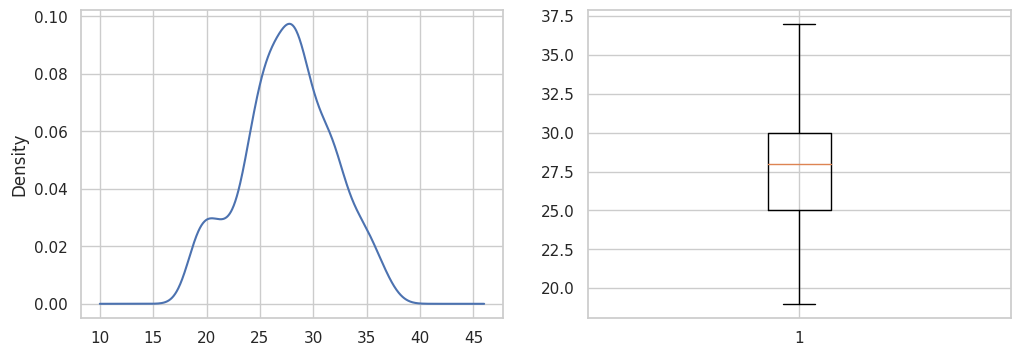

In [53]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['temperature'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['temperature'])
plt.show()

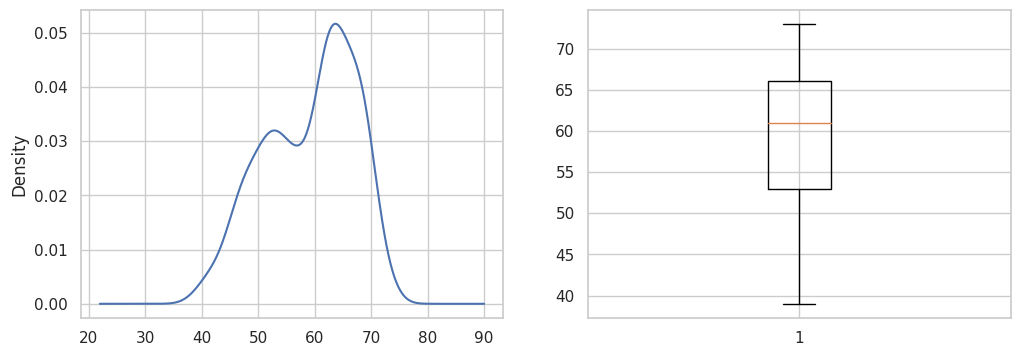

In [54]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['humidity'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['humidity'])
plt.show()

<Axes: xlabel='temperature'>

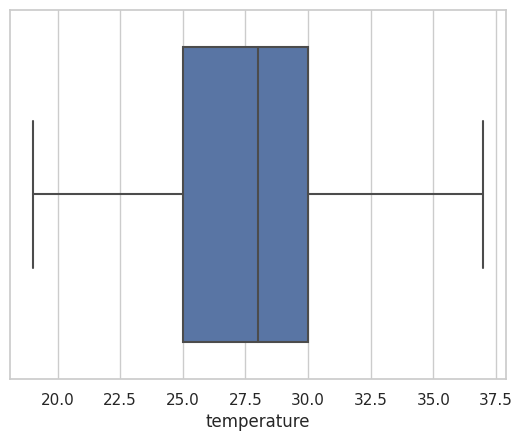

In [55]:
sns.boxplot(x=data_df['temperature'])

<Axes: xlabel='humidity'>

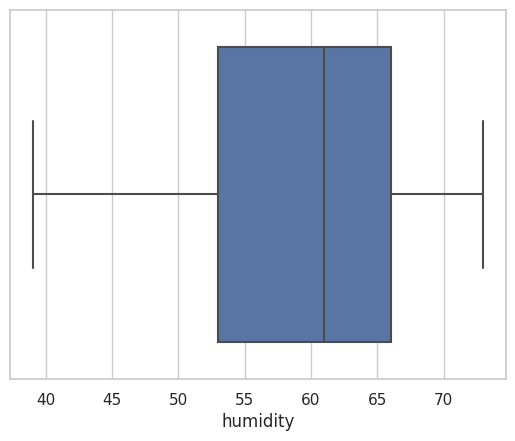

In [56]:
sns.boxplot(x=data_df['humidity'])

# Normalisasi data

In [57]:
data_df = data_df.drop(['cluster'], axis = 1)
data_df.head()

,temperature,humidity,label
0,23,64,jagung
1,27,72,jagung
2,24,72,jagung
3,20,58,jagung
4,19,63,jagung


In [58]:
Q1 = data_df['temperature'].quantile(0.25)
Q3 = data_df['temperature'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 25.0

Q3:
 30.0

IQR:
 5.0

Min:
 17.5

Max:
 37.5


In [59]:
filter_min = data_df['temperature']<boxplot_min
filter_max = data_df['temperature']>boxplot_max
data_df = data_df[~(filter_min|filter_max)] 
data_df.shape

(665, 3)

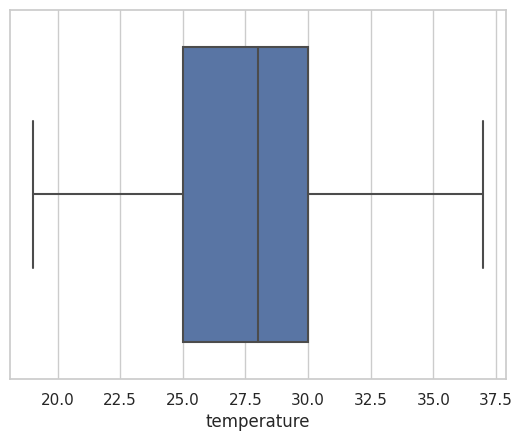

In [60]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_df['temperature'])

In [61]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
dtype: int64

In [62]:
# backup dataframe for encoding
data_df.to_csv('data_df.csv')
df_clean = data_df.copy()

In [63]:
df_clean.value_counts()

temperature  humidity  label        
27           53        kopi             6
28           64        lentil           5
26           58        kopi             4
29           62        lentil hitam     4
30           65        lentil hitam     4
                                       ..
26           69        jagung           1
             68        lentil hitam     1
             67        lentil hitam     1
                       lentil           1
37           63        kacang polong    1
Length: 479, dtype: int64

In [64]:
df_clean.tail()

,temperature,humidity,label
660,27,67,kopi
661,28,57,kopi
662,25,68,kopi
663,27,53,kopi
664,24,61,kopi


In [65]:
for feat in df_clean.columns:
    hh = df_clean.groupby(feat)['label'].count()
    print(feat,',', 'Unique :',len(df_clean[feat].unique()))

temperature , Unique : 19
humidity , Unique : 35
label , Unique : 7


# Visualisasi data

<ipython-input-66-3905aa958fbb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_clean.corr(), annot=True)


<Axes: >

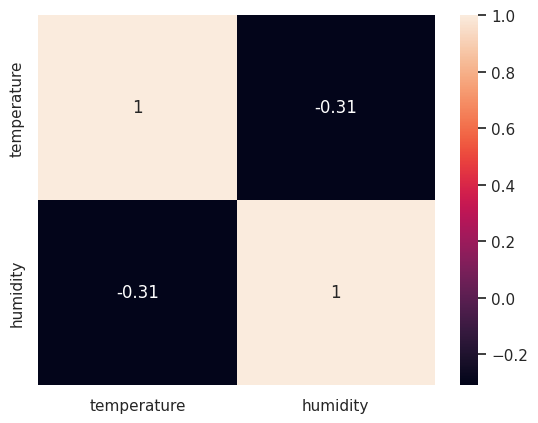

In [66]:
sns.heatmap(data=df_clean.corr(), annot=True)

In [67]:
df_clean.corr()

<ipython-input-67-798b28326b09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,temperature,humidity
temperature,1.00000,-0.30775
humidity,-0.30775,1.00000


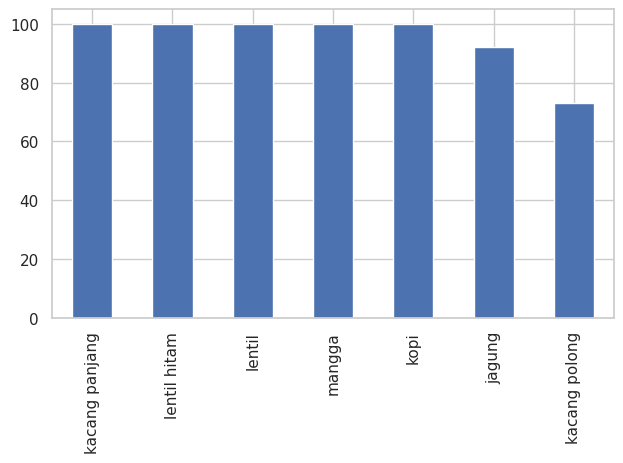

In [68]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

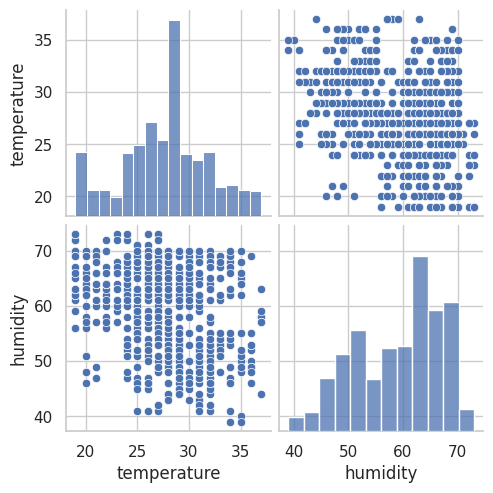

In [69]:
sns.pairplot(df_clean[[ 'temperature', 'humidity']])

# **Data Sintetik**

In [70]:
# pip install imbalanced-learn scikit-learn

In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Menampilkan jumlah sampel sebelum SMOTE
print("Jumlah sampel sebelum SMOTE:")
print(df_clean['label'].value_counts())
print("=============================")

df_clean = df_clean.drop(df_clean[df_clean['label'] == 'kacang polong'].index)
df_clean = df_clean.drop(df_clean[df_clean['label'] == 'kopi'].index)
df_clean = df_clean.drop(df_clean[df_clean['label'] == 'lentil'].index)



# Memisahkan fitur dan target
X = df_clean[['temperature', 'humidity']]
y = df_clean['label']


# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Membentuk dataset baru setelah SMOTE
# data_res = pd.DataFrame({
#     'temperature': X_res[:, 0],
#     'humidity': X_res[:, 1],
#     'label': y_res
# })

# Menampilkan jumlah sampel setelah SMOTE
print("\nJumlah sampel setelah SMOTE:")
print(y_res.value_counts())

Jumlah sampel sebelum SMOTE:
kacang panjang    100
lentil hitam      100
lentil            100
mangga            100
kopi              100
jagung             92
kacang polong      73
Name: label, dtype: int64

Jumlah sampel setelah SMOTE:
jagung            100
kacang panjang    100
lentil hitam      100
mangga            100
Name: label, dtype: int64


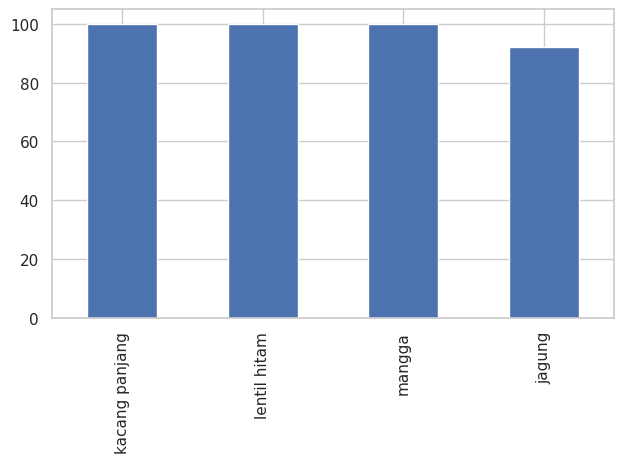

In [72]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

# **Klasifikasi model**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn import tree

# **Dataset features dan class label**

Split dataset ke training set dan testing set

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=10)

print('training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset:
(320, 2)
(320,)

testing dataset:
(80, 2)
(80,)


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 


# **Decission tree**

# Decission tree

In [76]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)
predicted_values = DecisionTree.predict(X_test)

**Accuracy** **Score**

In [77]:
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("DecisionTrees's Accuracy Score is: ", x)

DecisionTrees's Accuracy Score is:  0.8125


**Classification report**

In [78]:
print(classification_report(y_test,predicted_values)) #classification report

                precision    recall  f1-score   support

        jagung       0.94      0.81      0.87        21
kacang panjang       0.71      0.68      0.70        22
  lentil hitam       0.85      0.94      0.89        18
        mangga       0.76      0.84      0.80        19

      accuracy                           0.81        80
     macro avg       0.82      0.82      0.82        80
  weighted avg       0.82      0.81      0.81        80



**Confusion matrix**

In [79]:
print(confusion_matrix(y_test, predicted_values)) #confusion matrix

[[17  3  1  0]
 [ 0 15  2  5]
 [ 1  0 17  0]
 [ 0  3  0 16]]


In [80]:
from sklearn.model_selection import cross_val_score


In [81]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.86075949, 0.82278481, 0.85897436, 0.78205128, 0.82051282])

# KNN

In [82]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
predicted_values = knn.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("KNN's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

KNN's Accuracy Score is:  0.8
                precision    recall  f1-score   support

        jagung       0.94      0.81      0.87        21
kacang panjang       0.64      0.73      0.68        22
  lentil hitam       0.94      0.89      0.91        18
        mangga       0.75      0.79      0.77        19

      accuracy                           0.80        80
     macro avg       0.82      0.80      0.81        80
  weighted avg       0.81      0.80      0.80        80



# Naive bayes

In [83]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
predicted_values = gnb.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("Naive Bayes's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

Naive Bayes's Accuracy Score is:  0.85
                precision    recall  f1-score   support

        jagung       0.94      0.81      0.87        21
kacang panjang       0.74      0.77      0.76        22
  lentil hitam       0.86      1.00      0.92        18
        mangga       0.89      0.84      0.86        19

      accuracy                           0.85        80
     macro avg       0.86      0.86      0.85        80
  weighted avg       0.86      0.85      0.85        80



# Random forest

In [94]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.ravel())
predicted_values = rfc.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("RFC's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

RFC's Accuracy Score is:  0.8
                precision    recall  f1-score   support

        jagung       0.94      0.81      0.87        21
kacang panjang       0.65      0.77      0.71        22
  lentil hitam       0.89      0.89      0.89        18
        mangga       0.78      0.74      0.76        19

      accuracy                           0.80        80
     macro avg       0.82      0.80      0.81        80
  weighted avg       0.81      0.80      0.80        80

